In [4]:
pip install pandas numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import linregress

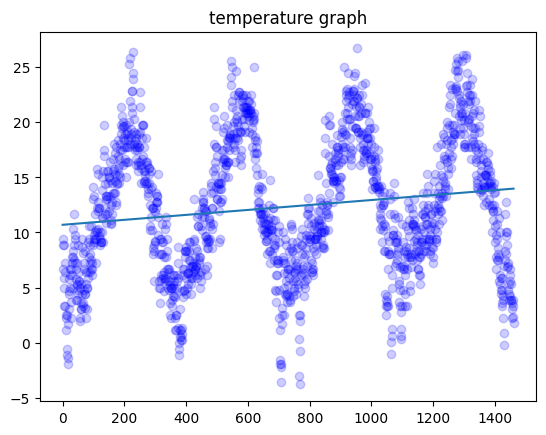

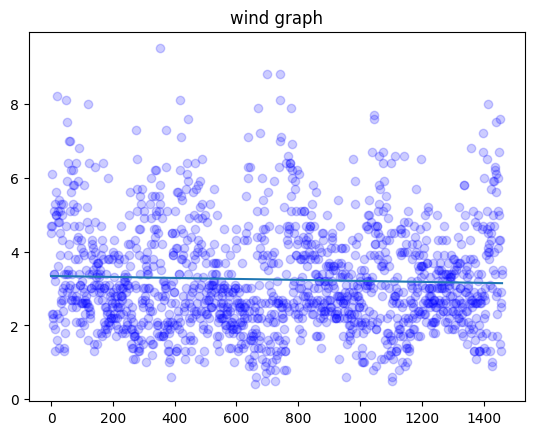

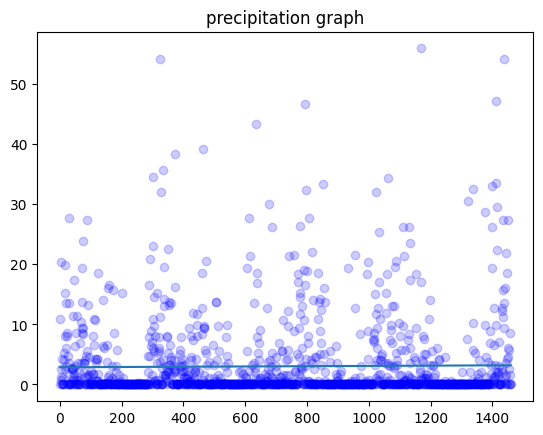

In [6]:
# READING CSV FILEp
file_path = "./seattle-weather.csv"
df = pd.read_csv(file_path)
# print(type(df))

# DIVIDING DATA BY COL
date = df.iloc[:,0]
rainfall = pd.DataFrame(df.iloc[:, 1])
# print(type(rainfall))
# maybe get yhe average tampoerature !!!
temp_min = np.array(df.iloc[:,2])
temp_max = np.array(df.iloc[:,3])
wind = pd.DataFrame(df.iloc[:, 4])

# FIND AVERAGE TEMPERATURE & C2-DATAFRAME
temp_avg = (temp_max + temp_min) / 2
df_temp = pd.DataFrame(temp_avg, columns=["temperature"] )
# WRITING TEMPERATURE TO CSV_FILE
combined_df = pd.concat([df,df_temp],axis=1)
# print(combined_df.tail())
combined_df.to_csv(file_path,index=False,mode='w')

dataF = pd.read_csv(file_path)

# # BASIC STATISTICS
mean_temp = np.mean(dataF["temperature"])
median_temp = np.median(dataF["temperature"])
std_temp = np.std(dataF["temperature"])

date = pd.to_datetime(date)
dataF['month'] = date.dt.month
# print(dataF["month"])

# FUNCTION
def anomaly_plot(col_name):
    

    mean_monthly_temp = dataF.groupby(dataF["month"])[col_name].mean()
    # print(mean_monthly_temp)

    # ANOMALY DETECTION
    anomalies = dataF[np.abs(dataF[col_name] - mean_temp) > 2 * std_temp]
    # print(anomalies)

    # slope, intercept,r_value,p_value, std_err = linregress(dataF['day'],dataF[col_name])

    dataF['day'] = np.arange(len(dataF))
    slope,intercept = np.polyfit(dataF['day'], dataF[col_name],1 )

    model = np.polyval([slope,intercept], dataF['day'])
    plt.scatter(dataF["day"], dataF[col_name], label = 'raw data', c = 'blue', alpha=0.2)
    plt.plot(dataF["day"], model)
    plt.title(f"{col_name} graph")
    plt.show()
    
anomaly_plot("temperature")
anomaly_plot("wind")
anomaly_plot("precipitation")
